# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import tensorflow as tf

from sofenn.FuzzyNetwork import FuzzyNetworkModel
from sofenn.callbacks import InitializeFuzzyWeights

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Read in and prep Iris Dataset

In [3]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [4]:
import pandas

In [5]:
features = pandas.DataFrame(iris.data, columns=iris.feature_names)
#features.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/features.csv', index=False)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pandas.DataFrame(Y, columns=iris.target_names)
#target.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/target.csv', index=False)
target.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [7]:
df = pandas.concat([pandas.DataFrame(iris.data), pandas.Series(iris.target)], axis=1)
df.columns = iris.feature_names + ['target']
#df.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris.csv', index=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#iris

In [9]:
X_train.shape

(135, 4)

In [10]:
fuzz = FuzzyNetworkModel(
            #input_shape=X_train.shape,           # data attributes
            features = 4,
            neurons=7, max_neurons=100,                 # initialization parameters
            prob_type='classification', target_classes=3
            )

In [11]:
fuzz.summary()

Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ FuzzyRules (FuzzyLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalize (NormalizeLayer)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Weights (WeightedLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outputs (OutputLayer)                │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
fuzz.compile()
fuzz.summary()

Compiling model...


Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ FuzzyRules (FuzzyLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalize (NormalizeLayer)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Weights (WeightedLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outputs (OutputLayer)                │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ FuzzyRules (FuzzyLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalize (NormalizeLayer)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Weights (WeightedLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outputs (OutputLayer)                │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
fuzz.get_layer("FuzzyRules")

<FuzzyLayer name=FuzzyRules, built=False>

In [14]:
#fuzz.get_layer("FuzzyRules").build(input_shape=X_train.shape)
fuzz.get_layer("FuzzyRules").get_weights()

[]

In [15]:
fuzz.summary()

Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ FuzzyRules (FuzzyLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalize (NormalizeLayer)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Weights (WeightedLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outputs (OutputLayer)                │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
fuzz.built

False

In [17]:
fuzz.fit(X_train, y_train, 
         callbacks=[InitializeFuzzyWeights(sample_data=X_train)],
         epochs=10, verbose=1, batch_size=16)

FuzzyNetwork cannot be built until seeing training data.
Initializing Fuzzy Weights prior to training...
params attribute: {'verbose': 1, 'epochs': 10, 'steps': 9}
Model Status: False
Fuzzy rules layer Status: <FuzzyLayer name=FuzzyRules, built=False>
Fuzzy rules weights: []
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.3860 - loss: 5.2506  
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3320 - loss: 5.2034
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3579 - loss: 5.1290
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - categorical_accuracy: 0.3402 - loss: 5.0852
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - categorical_accuracy: 0.3114 - loss: 5.1011
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - categorical_accuracy: 0.3278 - loss: 5.0105
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - categorical_accuracy: 0.4000 - loss: 4.9196
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - cate

In [18]:
fuzz.built

True

In [19]:
c, s = fuzz.get_layer("FuzzyRules").get_weights()

In [20]:
c.shape

(4, 7)

In [21]:
s.shape

(4, 7)

In [18]:
# new
fuzz.fit(X_train, 
         y_train,     
         init_c=True,
         random_sample=True,
         init_s=True,
         s_0=4.0,
         epochs=10, verbose=1, batch_size=16)

TypeError: fit() got an unexpected keyword argument 'init_c'

In [ ]:
# new
fuzz.fit(X_train, 
         y_train,     
         init_c=False,
         random_sample=True,
         init_s=False,
         s_0=4.0,
         epochs=10, verbose=1, batch_size=16)

In [ ]:
# fuzz.compile(
#     init_c=False,
#     sample_data=X_train,
#     random_sample=True,
#     init_s=False,
#     s_0=4.0
# )

In [ ]:
# # NEW
# fuzz = FuzzyNetworkModel(
#             input_shape=(4,),          # data attributes
#             neurons=5, max_neurons=100,                 # initialization parameters
#             problem_type='classification',
#             )

In [ ]:
fuzz.build(input_shape=X_train.shape)

In [ ]:
fuzz.get_layer("FuzzyRules").get_weights()

In [19]:
fuzz.compile(
    init_c=True,
    sample_data=X_train,
    random_sample=True,
    init_s=True,
    s_0=4.0
)

Compiling model...


TypeError: compile() got an unexpected keyword argument 'init_c'

In [20]:
fuzz.get_layer('FuzzyRules').get_weights()

[array([[5.6267214 , 6.814352  , 4.8489995 , 4.855015  , 7.259321  ,
         6.8615155 , 4.905853  ],
        [2.104066  , 2.9186497 , 3.3821993 , 3.662844  , 2.940587  ,
         2.8974903 , 3.5053458 ],
        [4.162252  , 4.855904  , 1.0359414 , 1.3450888 , 6.045792  ,
         4.898224  , 1.4864742 ],
        [1.4660872 , 1.6558231 , 0.03724612, 0.04885532, 2.2501423 ,
         1.6955307 , 0.28622863]], dtype=float32),
 array([[3.8256128, 3.8558068, 3.868494 , 3.9708881, 3.8523343, 3.8051116,
         3.8280616],
        [3.8163478, 3.9250364, 3.9498463, 3.9395463, 3.8885937, 3.8785498,
         3.8485363],
        [3.8212924, 3.83252  , 3.8320253, 3.9533918, 3.8856623, 3.7876756,
         3.7912889],
        [3.8171506, 3.8303099, 3.8361657, 3.957596 , 3.878203 , 3.7847621,
         3.794707 ]], dtype=float32)]

In [21]:
fuzz.get_layer("FuzzyRules").get_weights()

[array([[5.6267214 , 6.814352  , 4.8489995 , 4.855015  , 7.259321  ,
         6.8615155 , 4.905853  ],
        [2.104066  , 2.9186497 , 3.3821993 , 3.662844  , 2.940587  ,
         2.8974903 , 3.5053458 ],
        [4.162252  , 4.855904  , 1.0359414 , 1.3450888 , 6.045792  ,
         4.898224  , 1.4864742 ],
        [1.4660872 , 1.6558231 , 0.03724612, 0.04885532, 2.2501423 ,
         1.6955307 , 0.28622863]], dtype=float32),
 array([[3.8256128, 3.8558068, 3.868494 , 3.9708881, 3.8523343, 3.8051116,
         3.8280616],
        [3.8163478, 3.9250364, 3.9498463, 3.9395463, 3.8885937, 3.8785498,
         3.8485363],
        [3.8212924, 3.83252  , 3.8320253, 3.9533918, 3.8856623, 3.7876756,
         3.7912889],
        [3.8171506, 3.8303099, 3.8361657, 3.957596 , 3.878203 , 3.7847621,
         3.794707 ]], dtype=float32)]

In [22]:
# new
fuzz.fit(X_train, y_train, epochs=10, verbose=1, batch_size=16)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.6252 - loss: 3.9538
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6029 - loss: 3.8457
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6674 - loss: 3.6605  
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.5915 - loss: 3.7731
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - categorical_accuracy: 0.6212 - loss: 3.5597
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6300 - loss: 3.6409
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6500 - loss: 3.5354  
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6448 - loss: 3.4195
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - categorical_accuracy: 0.5659 - loss: 3.5918
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4129 - loss: 3.3049


In [23]:
fr = fuzz.get_layer("FuzzyRules")
fr.set_weights([(10,3), (100, 5)])

AttributeError: 'tuple' object has no attribute 'shape'

In [19]:
fuzz.get_layer_weights('FuzzyRules')

[array([[6.677573  , 5.40746   , 5.8867364 , 6.190227  , 4.9072223 ,
         5.1284227 , 4.9218335 ],
        [3.0991793 , 4.207425  , 2.7367637 , 2.9305239 , 2.2419083 ,
         2.6394134 , 3.3814323 ],
        [4.355627  , 1.3232865 , 5.19955   , 4.797422  , 3.200037  ,
         3.8219674 , 1.4251285 ],
        [1.3524771 , 0.11975723, 1.9998821 , 1.4933428 , 0.89980936,
         1.3195179 , 0.12228493]], dtype=float32),
 array([[3.9833057, 3.9150352, 4.0643263, 4.0265894, 3.9048488, 3.9269507,
         3.9136145],
        [3.956972 , 3.9999099, 4.001798 , 3.9855058, 3.9546363, 3.9580896,
         4.057376 ],
        [3.9269803, 3.9117258, 3.9011593, 3.915737 , 3.9002192, 3.9242802,
         3.910353 ],
        [3.9282525, 3.9082577, 3.8989468, 4.0318136, 3.9004974, 3.9251199,
         3.9064348]], dtype=float32)]

In [20]:
X_test

array([[4.7, 3.2, 1.3, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [6.1, 2.8, 4.7, 1.2],
       [5.5, 3.5, 1.3, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.7, 4.4, 1.5, 0.4],
       [7.7, 3. , 6.1, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [5.1, 3.8, 1.5, 0.3],
       [6.5, 3. , 5.5, 1.8],
       [5.6, 2.8, 4.9, 2. ]])

In [21]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [22]:
y_pred = fuzz.predict(X_test)
y_pred.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [23]:
acc = y_test == y_pred.round()
acc

array([[False,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [ True,  True, False],
       [ True, False,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [ True,  True, False],
       [ True,  True, False]])

In [24]:
acc.sum() / acc.size

0.7333333333333333

## Model Prediction Results

In [25]:
pred_loss, pred_bin_acc = fuzz.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - categorical_accuracy: 0.9333 - loss: 3.8179
Model Loss: 3.81791711
Binary Accuracy: 93.3%


In [26]:
fuzz.metrics_names

['loss', 'compile_metrics']

## Plot Results

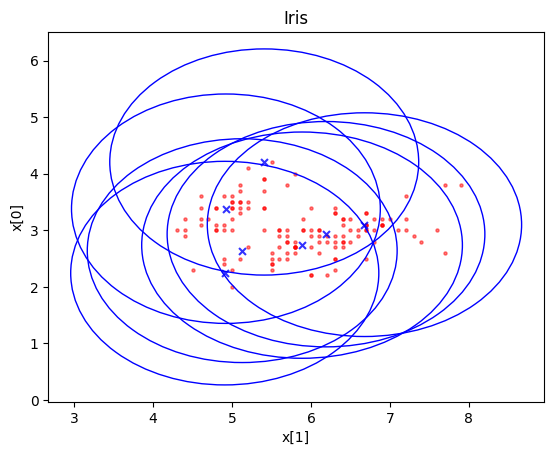

In [27]:
w = fuzz.get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()